# üîç ◊°◊ï◊í◊ô ◊î◊ò◊ô◊§◊ï◊ú ◊ï◊©◊ô◊ú◊ï◊ë◊ù ◊¢◊ù ◊ê◊ï◊®◊ó ◊ó◊ô◊ô◊ù ◊ï◊î◊™◊†◊î◊í◊ï◊ô◊ï◊™

### üéØ ◊û◊ò◊®◊™ ◊î◊§◊®◊ï◊ô◊ß◊ò
◊î◊†◊ô◊™◊ï◊ó ◊ë◊ï◊ó◊ü ◊õ◊ô◊¶◊ì ◊í◊ï◊®◊û◊ô◊ù ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô◊ô◊ù, ◊î◊™◊†◊î◊í◊ï◊™◊ô◊ô◊ù ◊ï◊ì◊û◊ï◊í◊®◊§◊ô◊ô◊ù ◊û◊™◊ß◊©◊®◊ô◊ù ◊ú◊®◊û◊ï◊™ ◊ó◊®◊ì◊î. ◊î◊ï◊ê ◊û◊™◊û◊ß◊ì ◊ë◊°◊ï◊í◊ô ◊ò◊ô◊§◊ï◊ú (◊®◊§◊ï◊ê◊ô ◊û◊ï◊ú ◊ò◊ë◊¢◊ô), ◊î◊®◊í◊ú◊ô ◊ë◊®◊ô◊ê◊ï◊™, ◊ï◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊ô◊ü ◊ß◊ë◊ï◊¶◊ï◊™ ◊í◊ô◊ú ◊ï◊¢◊ï◊ì.

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

df = pd.read_csv("enhanced_anxiety_dataset.csv")

In [4]:
df.head()

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   29  Female     Artist          6.0                           2.7   
1   46   Other      Nurse          6.2                           5.7   
2   64    Male      Other          5.0                           3.7   
3   20  Female  Scientist          5.8                           2.8   
4   49  Female      Other          8.2                           2.3   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       181                                 10     Yes   
1                       200                                  8     Yes   
2                       117                                  4      No   
3                       360                                  6     Yes   
4                       247                                  4     Yes   

  Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
0                        No                   10               114   
1                       Yes                    1                62   
2                       Yes                    1                91   
3                        No                    4                86   
4                        No                    1                98   

   Breathing Rate (breaths/min)  Sweating Level (1-5) Dizziness Medication  \
0                            14                     4        No        Yes   
1                            23                     2       Yes         No   
2                            28                     3        No         No   
3                            17                     3        No         No   
4                            19                     4       Yes        Yes   

   Therapy Sessions (per month) Recent Major Life Event  Diet Quality (1-10)  \
0                             3                     Yes                    7   
1                             2                      No                    8   
2                             1                     Yes                    1   
3                             0                      No                    1   
4                             1                      No                    3   

   Anxiety Level (1-10)  
0                   5.0  
1                   3.0  
2                   1.0  
3                   2.0  
4                   1.0

In [5]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

◊†◊ë◊ó◊ü ◊ê◊™ ◊©◊ô◊¢◊ï◊® ◊î◊†◊ë◊ì◊ß◊ô◊ù ◊©◊†◊ï◊ò◊ú◊ô◊ù ◊™◊®◊ï◊§◊ï◊™ ◊§◊°◊ô◊õ◊ô◊ê◊ò◊®◊ô◊ï◊™ ◊ú◊¢◊ï◊û◊™ ◊ê◊ú◊ï ◊©◊§◊ï◊†◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô.

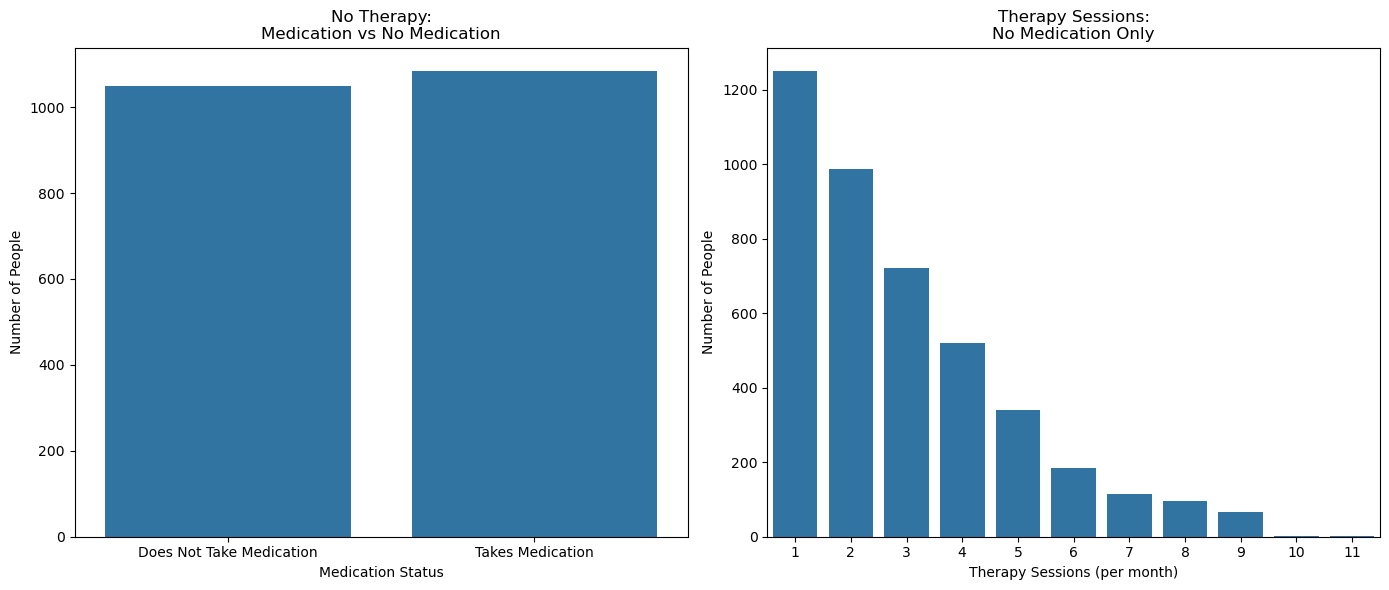

In [7]:
medication_only = df[(df['Medication'] == 'Yes') & (df['Therapy Sessions (per month)'] == 0)]
therapy_only = df[(df['Medication'] == 'No') & (df['Therapy Sessions (per month)'] > 0)]

# Re-defining therapy_only_participants since it's not currently defined
therapy_only_participants = df[(df['Medication'] == 'No') & (df['Therapy Sessions (per month)'] > 0)].copy()

# First graph: people who do not go to therapy at all, split by medication status
no_therapy_participants = df[df['Therapy Sessions (per month)'] == 0].copy()
no_therapy_participants['Medication Status'] = no_therapy_participants['Medication'].map({'Yes': 'Takes Medication', 'No': 'Does Not Take Medication'})

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Left graph: Medication status among those not going to therapy
sns.countplot(data=no_therapy_participants,
              x='Medication Status',
              ax=axes[0])
axes[0].set_title('No Therapy:\nMedication vs No Medication')
axes[0].set_ylabel('Number of People')

# Right graph: Therapy sessions among those who do not take medication
sns.countplot(data=therapy_only_participants,
              x='Therapy Sessions (per month)',
              ax=axes[1])
axes[1].set_title('Therapy Sessions:\nNo Medication Only')
axes[1].set_ylabel('Number of People')

plt.tight_layout()
plt.show()


◊†◊¶◊ô◊í ◊ê◊™ ◊î◊î◊™◊§◊ú◊í◊ï◊™ ◊ë◊ê◊ï◊§◊ü ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô ◊†◊ï◊°◊£.

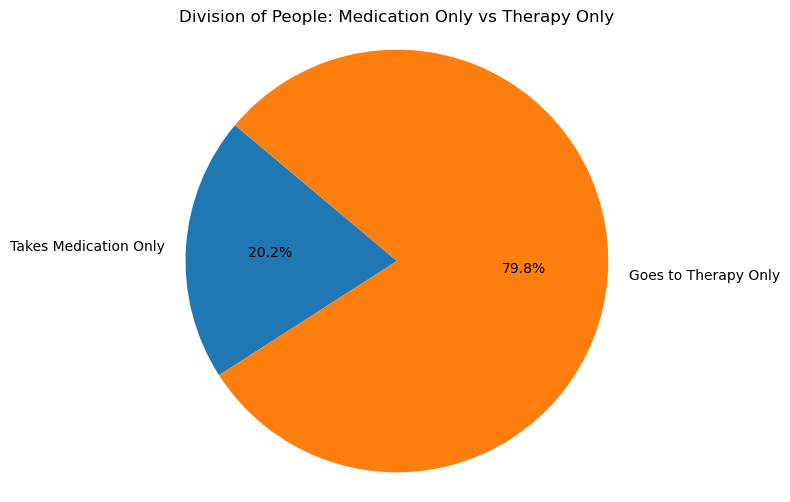

In [9]:
# Filter two exclusive groups

# Prepare data
labels = ['Takes Medication Only', 'Goes to Therapy Only']
sizes = [len(medication_only), len(therapy_only)]

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Division of People: Medication Only vs Therapy Only')
plt.axis('equal')
plt.show()


◊û◊î◊†◊™◊ï◊†◊ô◊ù ◊¢◊ï◊ú◊î ◊õ◊ô ◊õ-80% ◊û◊î◊†◊ë◊ì◊ß◊ô◊ù ◊§◊ï◊†◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊ï◊ê◊ô◊†◊ù ◊†◊ï◊ò◊ú◊ô◊ù ◊™◊®◊ï◊§◊ï◊™ ◊§◊°◊ô◊õ◊ô◊ê◊ò◊®◊ô◊ï◊™.

◊õ◊¢◊™ ◊†◊ë◊ó◊ü ◊ê◊™ ◊î◊ß◊©◊® ◊ë◊ô◊ü ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊ú◊ë◊ô◊ü ◊°◊ï◊í ◊î◊ò◊ô◊§◊ï◊ú: ◊™◊®◊ï◊§◊™◊ô ◊ê◊ï ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô.

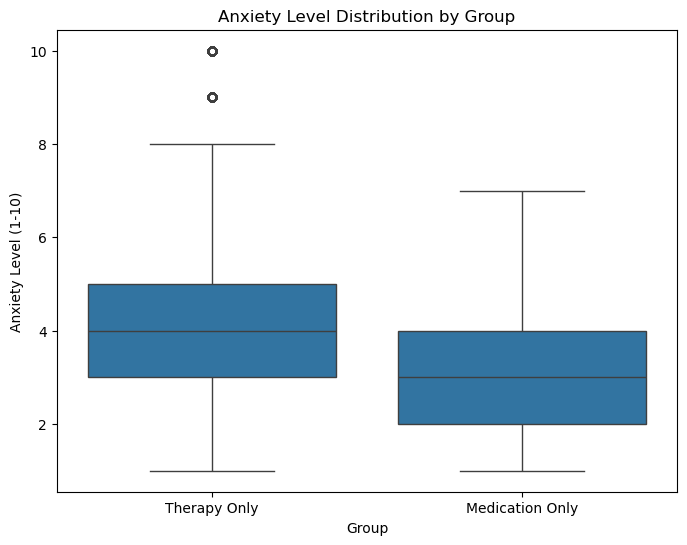

In [12]:
# Add a new column to identify group membership
df['Group'] = 'Other'
df.loc[medication_only.index, 'Group'] = 'Medication Only'
df.loc[therapy_only.index, 'Group'] = 'Therapy Only'

# Filter only the relevant groups
relevant_groups = df[df['Group'].isin(['Medication Only', 'Therapy Only'])]

# Plot the anxiety level distribution by group
plt.figure(figsize=(8, 6))
sns.boxplot(data=relevant_groups, x='Group', y='Anxiety Level (1-10)')
plt.title('Anxiety Level Distribution by Group')
plt.ylabel('Anxiety Level (1-10)')
plt.xlabel('Group')
plt.show()

◊†◊®◊ê◊î ◊õ◊ô ◊†◊ë◊ì◊ß◊ô◊ù ◊î◊ë◊ï◊ó◊®◊ô◊ù ◊ë◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊ë◊ú◊ë◊ì ◊û◊¶◊ô◊í◊ô◊ù ◊ë◊û◊û◊ï◊¶◊¢ ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊û◊¢◊ò ◊í◊ë◊ï◊î◊ï◊™ ◊ô◊ï◊™◊®.

◊†◊¢◊û◊ô◊ß ◊ë◊†◊ô◊™◊ï◊ó ◊©◊ú ◊†◊ë◊ì◊ß◊ô◊ù ◊î◊§◊ï◊†◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊ë◊ú◊ë◊ì, ◊ï◊†◊ë◊ó◊ü ◊õ◊ô◊¶◊ì ◊û◊©◊ö ◊î◊ò◊ô◊§◊ï◊ú ◊û◊©◊§◊ô◊¢ ◊¢◊ú ◊®◊û◊™ ◊î◊ó◊®◊ì◊î.

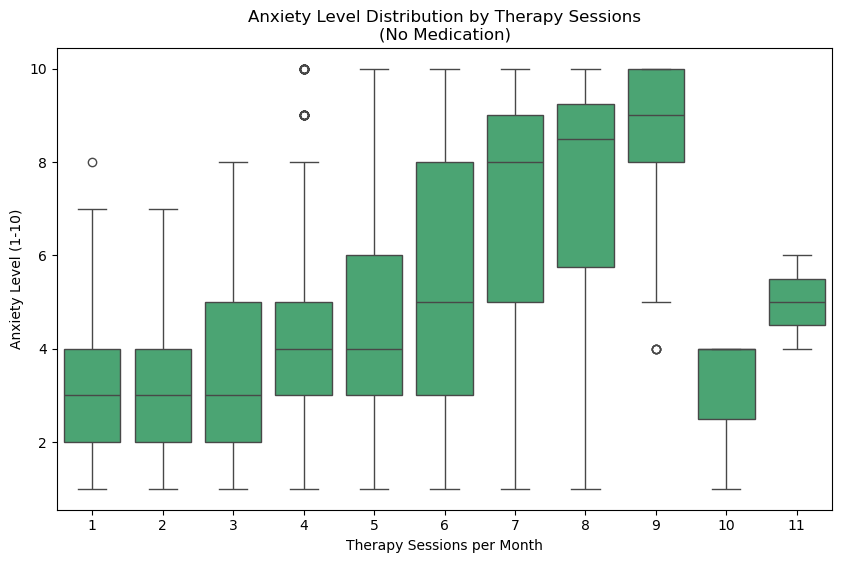

In [15]:
# Filter only people who go to therapy and do not take medication
therapy_no_med = df[(df['Therapy Sessions (per month)'] > 0) & (df['Medication'] == 'No')]

# Plot anxiety distribution by therapy sessions (no medication only)
plt.figure(figsize=(10, 6))
sns.boxplot(data=therapy_no_med,
            x='Therapy Sessions (per month)',
            y='Anxiety Level (1-10)',
            color='mediumseagreen')
plt.title('Anxiety Level Distribution by Therapy Sessions\n(No Medication)')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Anxiety Level (1-10)')
plt.show()


◊õ◊õ◊ú ◊©◊û◊©◊ö ◊î◊ò◊ô◊§◊ï◊ú ◊î◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊¢◊ï◊ú◊î, ◊®◊û◊™ ◊î◊ó◊®◊ì◊î ◊î◊û◊û◊ï◊¶◊¢◊™ ◊¢◊ï◊ú◊î ◊í◊ù ◊î◊ô◊ê.
◊¢◊ù ◊ñ◊ê◊™, ◊†◊®◊ê◊î ◊õ◊ô ◊†◊ë◊ì◊ß◊ô◊ù ◊î◊¢◊ï◊ë◊®◊ô◊ù 10‚Äì11 ◊ò◊ô◊§◊ï◊ú◊ô◊ù ◊ë◊ó◊ï◊ì◊© (◊õ◊©◊ú◊ï◊©◊î ◊ò◊ô◊§◊ï◊ú◊ô◊ù ◊ë◊©◊ë◊ï◊¢) ◊û◊¶◊ô◊í◊ô◊ù ◊ì◊ï◊ï◊ß◊ê ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊†◊û◊ï◊õ◊ï◊™ ◊ô◊ï◊™◊®.
◊†◊ë◊ì◊ï◊ß ◊ê◊™ ◊î◊û◊û◊¶◊ê◊ô◊ù ◊ú◊¢◊ï◊û◊ß ‚Äì ◊™◊ó◊ô◊ú◊î ◊†◊ë◊ó◊ü ◊ê◊™ ◊í◊ï◊ì◊ú ◊î◊ß◊ë◊ï◊¶◊î.

In [17]:
therapy_no_med_filtered = therapy_no_med[therapy_no_med['Therapy Sessions (per month)'] >= 10]
therapy_no_med_filtered['Therapy Sessions (per month)'].value_counts()

Therapy Sessions (per month)
10    3
11    2
Name: count, dtype: int64

◊†◊®◊ê◊î ◊õ◊ô ◊û◊ì◊ï◊ë◊® ◊ë◊ß◊ë◊ï◊¶◊î ◊ß◊ò◊†◊î ◊©◊ú ◊ó◊û◊ô◊©◊î ◊†◊ë◊ì◊ß◊ô◊ù ◊ë◊ú◊ë◊ì. ◊ú◊õ◊ü, ◊†◊ô◊û◊†◊¢ ◊ë◊©◊ú◊ë ◊ñ◊î ◊û◊î◊°◊ß◊™ ◊û◊°◊ß◊†◊ï◊™ ◊û◊ë◊ï◊°◊°◊ï◊™.

◊†◊¶◊ô◊í ◊ê◊™ ◊î◊í◊®◊£ ◊û◊ó◊ì◊© ◊ú◊ú◊ê ◊ê◊ï◊™◊ù ◊†◊ë◊ì◊ß◊ô◊ù ◊ó◊®◊ô◊í◊ô◊ù.

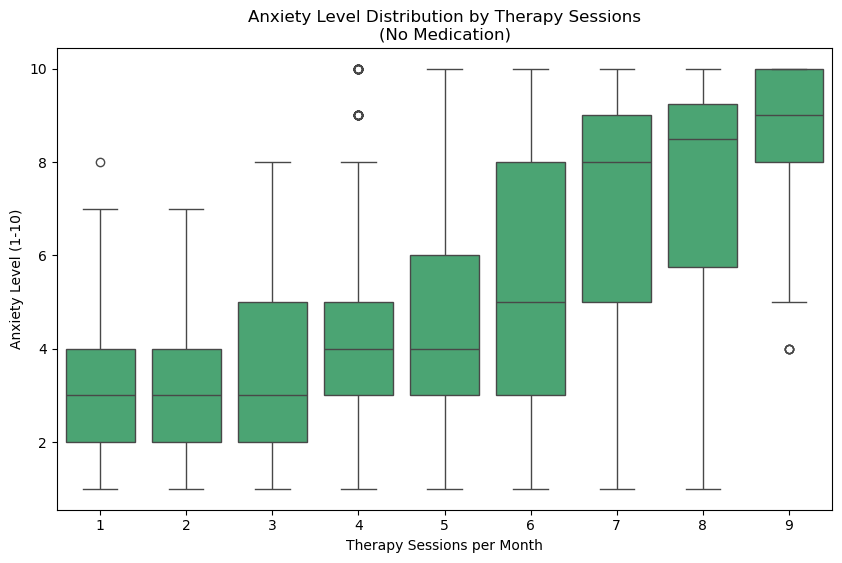

In [20]:
# Filter only people who go to therapy and do not take medication
therapy_no_med = df[(df['Therapy Sessions (per month)'] > 0) & (df['Medication'] == 'No')]

# Remove people who attend 10+ therapy sessions (even if few exist)
therapy_no_med = therapy_no_med[therapy_no_med['Therapy Sessions (per month)'] < 10]
# Make a safe copy
therapy_no_med = therapy_no_med.copy()


# Plot anxiety distribution by therapy sessions (no medication only)
plt.figure(figsize=(10, 6))
sns.boxplot(data=therapy_no_med,
            x='Therapy Sessions (per month)',
            y='Anxiety Level (1-10)',
            color='mediumseagreen')
plt.title('Anxiety Level Distribution by Therapy Sessions\n(No Medication)')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Anxiety Level (1-10)')
plt.show()


◊õ◊¢◊™ ◊†◊¢◊û◊ô◊ß ◊ï◊†◊ë◊ó◊ü ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊†◊ï◊°◊§◊ô◊ù ◊©◊ú ◊ß◊ë◊ï◊¶◊ï◊™ ◊©◊ï◊†◊ï◊™.

## ◊õ◊ô◊¶◊ì ◊û◊™◊§◊ú◊í◊ô◊ù ◊î◊í◊ô◊ú◊ê◊ô◊ù ◊ë◊ß◊ë◊ï◊¶◊î ◊ñ◊ï?

C:\Users\danie\AppData\Local\Temp\ipykernel_4292\2154064568.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = therapy_no_med.groupby(['Therapy Sessions (per month)', 'Age Group'])['Anxiety Level (1-10)'].mean().reset_index()


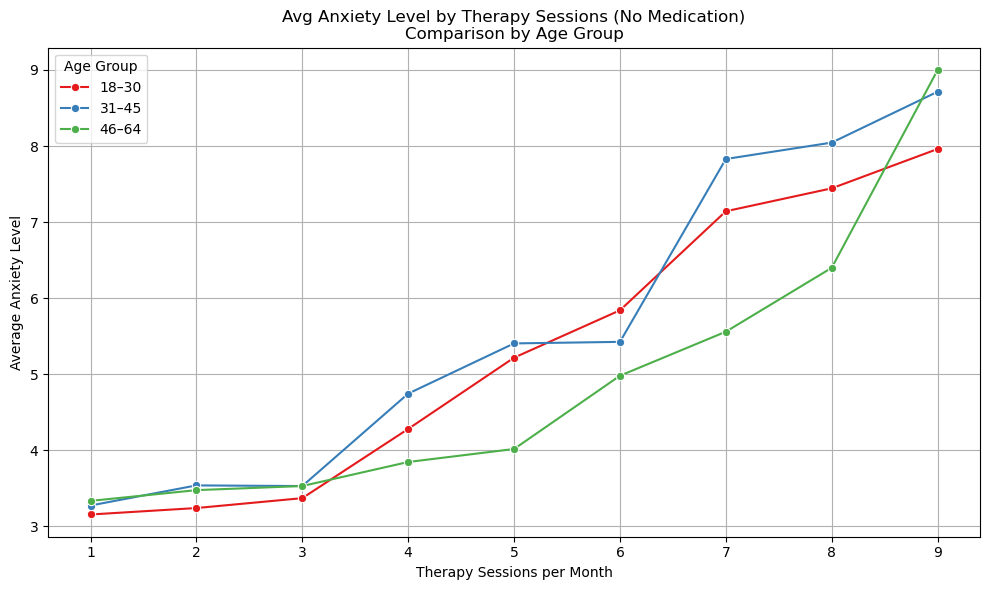

In [23]:
# Define age bins (18‚Äì64 only)
age_bins = [17, 30, 45, 65]
age_labels = ['18‚Äì30', '31‚Äì45', '46‚Äì64']
therapy_no_med['Age Group'] = pd.cut(therapy_no_med['Age'], bins=age_bins, labels=age_labels)

# Group by Therapy Sessions and Age Group to calculate mean anxiety
grouped = therapy_no_med.groupby(['Therapy Sessions (per month)', 'Age Group'])['Anxiety Level (1-10)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grouped,
    x='Therapy Sessions (per month)',
    y='Anxiety Level (1-10)',
    hue='Age Group',
    marker='o',
    palette='Set1',
    err_style='band',  # shaded error bands
)
plt.title('Avg Anxiety Level by Therapy Sessions (No Medication)\nComparison by Age Group')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right;">

### üß† ◊™◊ï◊ë◊†◊î ◊®◊ê◊©◊ï◊†◊î:

◊ë◊ß◊ë◊ï◊¶◊™ ◊î◊í◊ô◊ú **46‚Äì64**, ◊ß◊¶◊ë ◊¢◊ú◊ô◊ô◊™ ◊®◊û◊ï◊™ ◊î◊ó◊®◊ì◊î ◊¢◊ù ◊î◊¢◊ú◊ô◊ô◊î ◊ë◊™◊ì◊ô◊®◊ï◊™ ◊î◊û◊§◊í◊©◊ô◊ù ◊î◊ò◊ô◊§◊ï◊ú◊ô◊ô◊ù ◊î◊ô◊î ◊ê◊ô◊ò◊ô ◊ô◊ï◊™◊® ◊ë◊î◊©◊ï◊ï◊ê◊î ◊ú◊ß◊ë◊ï◊¶◊ï◊™ ◊í◊ô◊ú ◊¶◊¢◊ô◊®◊ï◊™ ◊ô◊ï◊™◊®.

◊î◊°◊ë◊® ◊ê◊§◊©◊®◊ô ◊ú◊õ◊ö ◊ò◊û◊ï◊ü ◊ë◊õ◊ö ◊©◊¢◊ù ◊î◊í◊ô◊ú ◊û◊¶◊ò◊ë◊®◊ï◊™ ◊í◊ù **◊û◊ô◊ï◊û◊†◊ï◊ô◊ï◊™ ◊ò◊ë◊¢◊ô◊ï◊™ ◊ú◊ï◊ï◊ô◊°◊ï◊™ ◊®◊í◊©◊ô** ‚Äì ◊ë◊ô◊ü ◊ê◊ù ◊û◊™◊ï◊ö ◊†◊ô◊°◊ô◊ï◊ü ◊ó◊ô◊ô◊ù, ◊î◊™◊û◊ï◊ì◊ì◊ï◊™ ◊¢◊ù ◊û◊¶◊ë◊ô ◊ú◊ó◊• ◊ú◊ê◊ï◊®◊ö ◊î◊©◊†◊ô◊ù, ◊ê◊ï ◊î◊°◊™◊í◊ú◊ï◊™ ◊ú◊û◊¶◊ë◊ô◊ù ◊û◊©◊™◊†◊ô◊ù. ◊ô◊ô◊™◊õ◊ü ◊©◊ë◊†◊ô ◊ß◊ë◊ï◊¶◊™ ◊í◊ô◊ú ◊ñ◊ï ◊û◊í◊ô◊¢◊ô◊ù ◊ú◊ò◊ô◊§◊ï◊ú ◊¢◊ù ◊ô◊õ◊ï◊ú◊ï◊™ ◊î◊™◊û◊ï◊ì◊ì◊ï◊™ ◊ë◊°◊ô◊°◊ô◊ï◊™ ◊©◊û◊§◊ó◊ô◊™◊ï◊™ ◊ê◊™ ◊¢◊ï◊¶◊û◊™ ◊î◊™◊í◊ï◊ë◊î ◊î◊ò◊ô◊§◊ï◊ú◊ô◊™ ◊î◊®◊ê◊©◊ï◊†◊ô◊™.

</div>



## ◊õ◊ô◊¶◊ì ◊ë◊ê◊î ◊ú◊ô◊ì◊ô ◊ë◊ô◊ò◊ï◊ô ◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™ ◊©◊ú ◊ó◊®◊ì◊î ◊ë◊ß◊®◊ë ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô◊™?

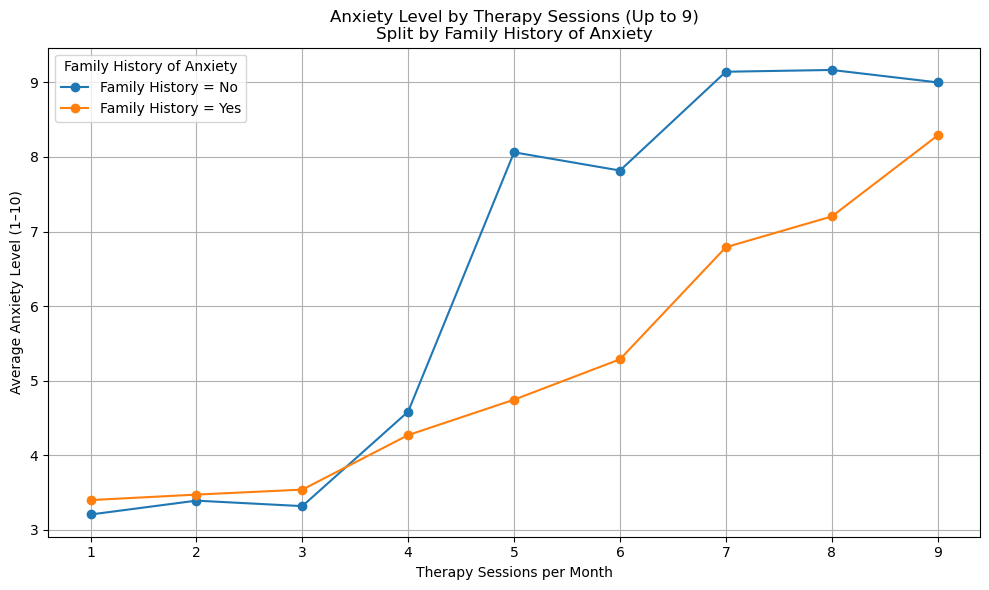

In [26]:
grouped = therapy_no_med.groupby(
    ['Therapy Sessions (per month)', 'Family History of Anxiety']
)['Anxiety Level (1-10)'].mean().reset_index()

pivoted = grouped.pivot(
    index='Therapy Sessions (per month)',
    columns='Family History of Anxiety',
    values='Anxiety Level (1-10)'
)

plt.figure(figsize=(10, 6))
for col in pivoted.columns:
    plt.plot(pivoted.index, pivoted[col], marker='o', label=f'Family History = {col}')

plt.title('Anxiety Level by Therapy Sessions (Up to 9)\nSplit by Family History of Anxiety')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level (1‚Äì10)')
plt.legend(title='Family History of Anxiety')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### üß† ◊™◊ï◊ë◊†◊î ◊©◊†◊ô◊î:

</div>


<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
<strong>◊î◊ô◊°◊ò◊ï◊®◊ô◊™ ◊ó◊®◊ì◊î ◊ë◊û◊©◊§◊ó◊î - ◊û◊õ◊©◊ô◊® ◊î◊°◊™◊í◊ú◊ï◊™?</strong><br>
◊û◊ò◊ï◊§◊ú◊ô◊ù ◊ú◊ú◊ê ◊î◊ô◊°◊ò◊ï◊®◊ô◊™ ◊ó◊®◊ì◊î ◊ë◊û◊©◊§◊ó◊î ◊¢◊ú◊ï◊ú◊ô◊ù ◊ú◊î◊ô◊ï◊™ ◊§◊ó◊ï◊™ ◊û◊ï◊ì◊¢◊ô◊ù ◊ú◊û◊ï◊©◊í◊ô◊ù ◊©◊ú ◊ï◊ô◊°◊ï◊™ ◊®◊í◊©◊ô ◊ï◊ú◊î◊í◊ô◊ë ◊ë◊ó◊®◊ì◊î ◊û◊ï◊í◊ë◊®◊™ ◊ë◊¢◊ß◊ë◊ï◊™ ◊ó◊©◊ô◊§◊î ◊®◊í◊©◊ô◊™ ◊§◊™◊ê◊ï◊û◊ô◊™ ◊ë◊ò◊ô◊§◊ï◊ú.<br>
◊ú◊õ◊ü, ◊ó◊©◊ï◊ë ◊ú◊î◊¢◊†◊ô◊ß ◊ú◊î◊ù ◊î◊õ◊†◊î ◊û◊ï◊™◊ê◊û◊™ ◊ï◊ú◊ô◊ï◊ï◊ô ◊®◊í◊©◊ô ◊î◊ì◊ï◊ß ◊ë◊™◊ó◊ô◊ú◊™ ◊î◊ì◊®◊ö.
</div>


## ◊î◊©◊ï◊ï◊ê◊™ ◊î◊™◊†◊î◊í◊ï◊ô◊ï◊™ ◊ó◊ô◊¶◊ï◊†◊ô◊ï◊™: ◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊ú◊¢◊ï◊û◊™ ◊ò◊ô◊§◊ï◊ú ◊™◊®◊ï◊§◊™◊ô

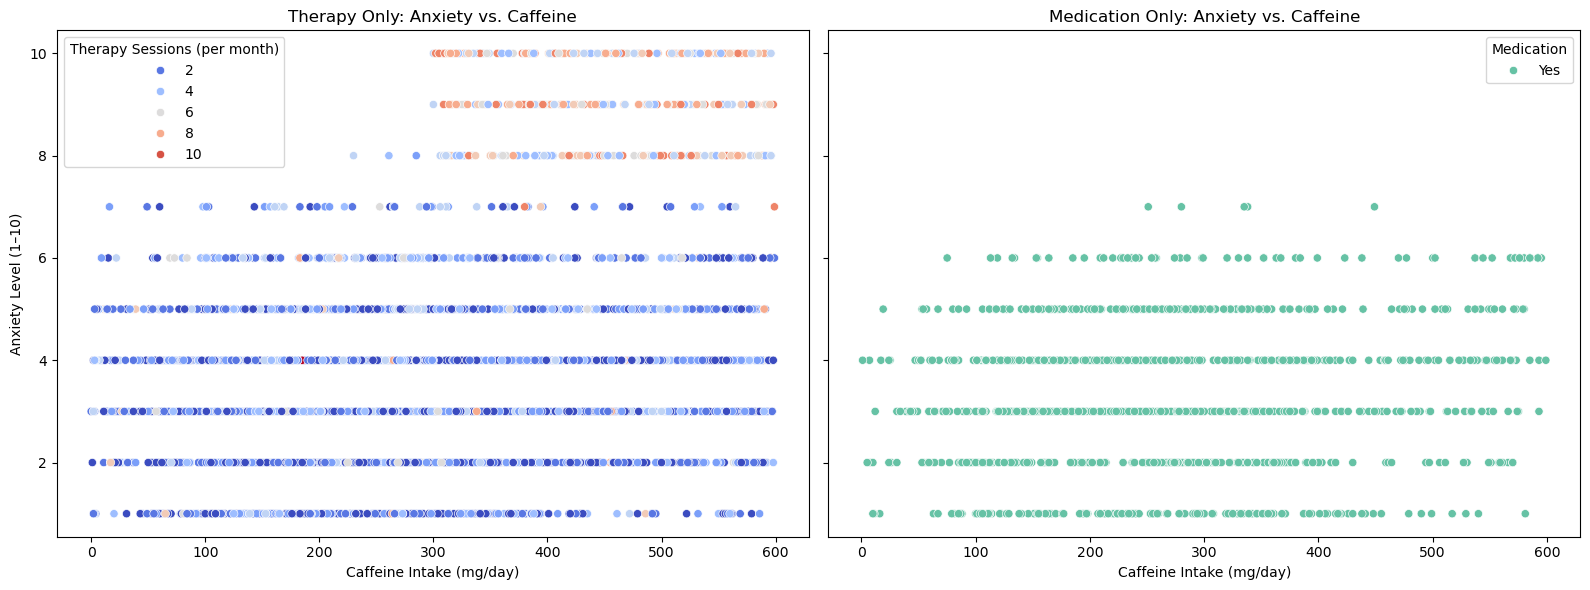

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Therapy Only
sns.scatterplot(
    data=therapy_only,
    x='Caffeine Intake (mg/day)',
    y='Anxiety Level (1-10)',
    hue='Therapy Sessions (per month)',
    palette='coolwarm',
    ax=axes[0]
)
axes[0].set_title('Therapy Only: Anxiety vs. Caffeine')
axes[0].set_xlabel('Caffeine Intake (mg/day)')
axes[0].set_ylabel('Anxiety Level (1‚Äì10)')

#  Medication Only
sns.scatterplot(
    data=medication_only,
    x='Caffeine Intake (mg/day)',
    y='Anxiety Level (1-10)',
    hue='Medication',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Medication Only: Anxiety vs. Caffeine')
axes[1].set_xlabel('Caffeine Intake (mg/day)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

<div dir="rtl">

### üß† ◊™◊ï◊ë◊†◊î ◊©◊ú◊ô◊©◊ô◊™ :
- ◊ß◊ô◊ô◊ù ◊ß◊©◊® ◊ó◊ô◊ï◊ë◊ô ◊û◊™◊ï◊ü ◊ë◊ô◊ü ◊¶◊®◊ô◊õ◊™ ◊ß◊§◊ê◊ô◊ü ◊ú◊®◊û◊™ ◊ó◊®◊ì◊î ‚Äì ◊õ◊õ◊ú ◊©◊õ◊û◊ï◊™ ◊î◊ß◊§◊ê◊ô◊ü ◊î◊ô◊ï◊û◊ô◊™ ◊¢◊ï◊ú◊î, ◊†◊¶◊§◊ô◊ù ◊ô◊ï◊™◊® ◊û◊ß◊®◊ô◊ù ◊©◊ú ◊®◊û◊ï◊™ ◊ó◊®◊ì◊î ◊í◊ë◊ï◊î◊ï◊™, ◊ë◊û◊ô◊ï◊ó◊ì ◊ë◊¶◊®◊ô◊õ◊î ◊î◊¢◊ï◊ú◊î ◊¢◊ú 300 ◊û"◊í ◊ú◊ô◊ï◊ù.

</div>


<div dir="rtl" style="text-align: right;">

### üìå ◊û◊°◊ß◊†◊î ◊û◊®◊õ◊ñ◊ô◊™ ◊ú◊û◊ß◊ë◊ú◊ô ◊î◊ó◊ú◊ò◊ï◊™:

◊î◊†◊ô◊™◊ï◊ó ◊û◊¶◊ë◊ô◊¢ ◊¢◊ú ◊õ◊ö ◊©**◊î◊ß◊©◊® ◊ë◊ô◊ü ◊ó◊®◊ì◊î ◊ú◊ë◊ô◊ü ◊û◊©◊™◊†◊ô◊ù ◊î◊™◊†◊î◊í◊ï◊™◊ô◊ô◊ù (◊õ◊û◊ï ◊¶◊®◊ô◊õ◊™ ◊ß◊§◊ê◊ô◊ü) ◊û◊©◊™◊†◊î ◊ë◊ê◊ï◊§◊ü ◊û◊î◊ï◊™◊ô ◊ú◊§◊ô ◊°◊ï◊í ◊î◊ò◊ô◊§◊ï◊ú ◊î◊†◊ô◊™◊ü ◊ú◊û◊ò◊ï◊§◊ú**.  
◊ë◊¢◊ï◊ì ◊©◊ò◊ô◊§◊ï◊ú ◊™◊®◊ï◊§◊™◊ô ◊û◊§◊ó◊ô◊™ ◊ê◊™ ◊î◊®◊í◊ô◊©◊ï◊™ ◊ú◊î◊©◊§◊¢◊ï◊™ ◊©◊ú◊ô◊ú◊ô◊ï◊™ ◊©◊ú ◊ß◊§◊ê◊ô◊ü ◊¢◊ú ◊ó◊®◊ì◊î, ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊î◊û◊°◊™◊û◊õ◊ô◊ù ◊¢◊ú ◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ◊ë◊ú◊ë◊ì ◊û◊¶◊ô◊í◊ô◊ù ◊§◊í◊ô◊¢◊ï◊™ ◊í◊ë◊ï◊î◊î ◊ô◊ï◊™◊® ◊ú◊î◊©◊§◊¢◊ï◊™ ◊ê◊ú◊ï ‚Äî ◊ë◊¢◊ô◊ß◊® ◊ë◊ß◊®◊ë ◊¶◊¢◊ô◊®◊ô◊ù ◊ï◊ú◊ú◊ê ◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™ ◊©◊ú ◊ó◊®◊ì◊î.

◊ô◊™◊®◊î ◊û◊õ◊ö, ◊†◊®◊ê◊î ◊õ◊ô **◊ú◊í◊ô◊ú ◊ï◊ú◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™ ◊™◊§◊ß◊ô◊ì ◊û◊™◊ï◊ï◊ö ◊û◊©◊û◊¢◊ï◊™◊ô** ◊ë◊û◊ô◊ì◊™ ◊î◊©◊ô◊§◊ï◊® ◊©◊†◊¶◊§◊î ◊ë◊û◊î◊ú◊ö ◊ò◊ô◊§◊ï◊ú. ◊û◊ë◊ï◊í◊®◊ô◊ù ◊ë◊¢◊ú◊ô ◊®◊ß◊¢ ◊û◊©◊§◊ó◊™◊ô ◊ó◊ô◊ï◊ë◊ô ◊û◊í◊ô◊ë◊ô◊ù ◊ë◊¶◊ï◊®◊î ◊©◊ï◊†◊î ‚Äî ◊ï◊û◊™◊ï◊†◊î ◊ô◊ï◊™◊® ‚Äî ◊ú◊¢◊ï◊û◊™ ◊¶◊¢◊ô◊®◊ô◊ù ◊ó◊°◊®◊ô ◊®◊ß◊¢ ◊û◊©◊§◊ó◊™◊ô.

</div>

---

<div dir="rtl" style="text-align: right; border: 1px solid #cce5ff; padding: 15px; background-color: #eaf4ff; border-radius: 8px; margin-top: 15px;">
‚úÖ ◊î◊û◊ú◊¶◊î ◊ú◊û◊ì◊ô◊†◊ô◊ï◊™:

◊ô◊© ◊ú◊î◊ï◊ë◊ô◊ú ◊û◊ì◊ô◊†◊ô◊ï◊™ ◊ò◊ô◊§◊ï◊ú ◊û◊ï◊™◊ê◊û◊™ ◊ê◊ô◊©◊ô◊™ ‚Äì ◊î◊û◊©◊ú◊ë◊™ **◊û◊ô◊§◊ï◊ô ◊®◊ê◊©◊ï◊†◊ô ◊©◊ú ◊§◊®◊ï◊§◊ô◊ú ◊®◊í◊©◊ô, ◊í◊ô◊ú ◊ï◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™**, ◊õ◊ë◊® ◊ë◊™◊ó◊ô◊ú◊™ ◊ß◊©◊® ◊ò◊ô◊§◊ï◊ú◊ô.

- ◊¢◊ë◊ï◊® ◊û◊ò◊ï◊§◊ú◊ô◊ù **◊¶◊¢◊ô◊®◊ô◊ù ◊ï◊ú◊ú◊ê ◊î◊ô◊°◊ò◊ï◊®◊ô◊î ◊û◊©◊§◊ó◊™◊ô◊™**, ◊û◊ï◊û◊ú◊• ◊ú◊©◊ú◊ë ◊î◊ì◊®◊õ◊î ◊¢◊ú ◊ï◊ô◊°◊ï◊™ ◊®◊í◊©◊ô ◊ï◊î◊í◊ë◊ú◊™ ◊ß◊§◊ê◊ô◊ü ◊ë◊ê◊ï◊§◊ü ◊ô◊ñ◊ï◊ù ◊ï◊û◊ï◊ë◊†◊î.
- ◊¢◊ë◊ï◊® ◊û◊ò◊ï◊§◊ú◊ô◊ù ◊©◊û◊°◊™◊û◊õ◊ô◊ù ◊®◊ß ◊¢◊ú ◊ò◊ô◊§◊ï◊ú ◊§◊°◊ô◊õ◊ï◊ú◊ï◊í◊ô ‚Äì ◊ô◊© ◊ú◊î◊í◊ë◊ô◊® ◊ê◊™ ◊î◊ú◊ô◊ï◊ï◊ô ◊î◊®◊í◊©◊ô ◊ë◊©◊ú◊ë◊ô ◊î◊ó◊©◊ô◊§◊î ◊î◊®◊ê◊©◊ï◊†◊ô◊ô◊ù.
- ◊õ◊û◊ï ◊õ◊ü, ◊û◊ï◊û◊ú◊• ◊ú◊¢◊ï◊ì◊ì ◊û◊ó◊ß◊® ◊†◊ï◊°◊£ ◊ú◊©◊ù ◊î◊ë◊†◊™ **◊î◊î◊©◊§◊¢◊î ◊î◊û◊í◊ô◊†◊î ◊©◊ú ◊ò◊ô◊§◊ï◊ú ◊™◊®◊ï◊§◊™◊ô** ◊ë◊û◊¶◊ë◊ô◊ù ◊©◊ú ◊ó◊©◊ô◊§◊î ◊ú◊í◊ï◊®◊û◊ô◊ù ◊û◊ó◊®◊ô◊§◊ô◊ù (◊õ◊í◊ï◊ü ◊ß◊§◊ê◊ô◊ü).

</div>
